In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv(r'C:\Users\risha\case_study\tripadvisor_review.csv',index_col='User ID')
data.columns = ["art_galleries","dance_clubs","juice_bars","restaurants","museums","resorts","parks","beaches","theaters","religious_institutions"]
data.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,parks,beaches,theaters,religious_institutions
User ID,,,,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
data.shape

(980, 10)

<AxesSubplot:>

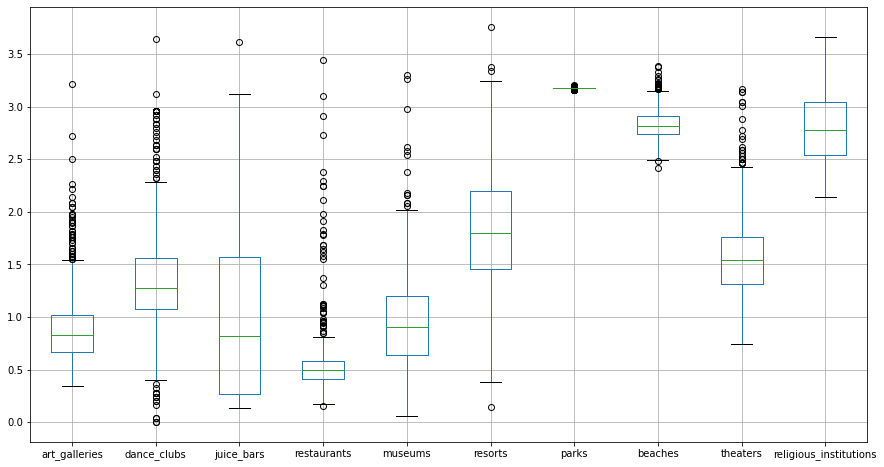

In [4]:
plt.figure(figsize=(15,8))
data.boxplot()

C:\Users\risha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='art_galleries'>

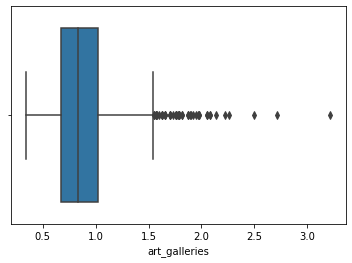

In [5]:
sns.boxplot(data["art_galleries"])

In [6]:
data.mean()

art_galleries             0.893194
dance_clubs               1.352612
juice_bars                1.013306
restaurants               0.532500
museums                   0.939735
resorts                   1.842898
parks                     3.180939
beaches                   2.835061
theaters                  1.569439
religious_institutions    2.799224
dtype: float64

<AxesSubplot:>

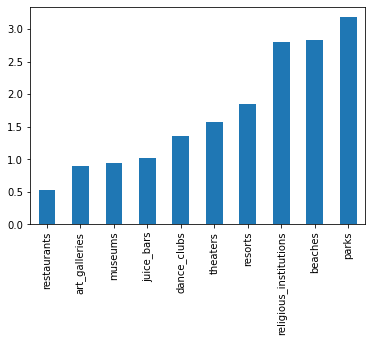

In [7]:
data.mean().sort_values(ascending=True).plot.bar()

<AxesSubplot:>

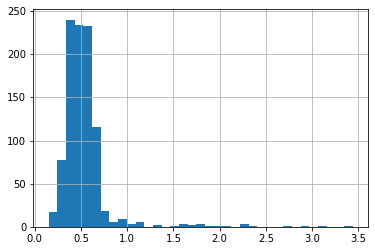

In [8]:
data.restaurants.hist(bins=35)

In [9]:
data.mean(axis=1).sort_values()

User ID
User 979    1.213
User 385    1.305
User 324    1.341
User 542    1.383
User 190    1.389
            ...  
User 813    2.119
User 796    2.130
User 537    2.155
User 248    2.225
User 667    2.225
Length: 980, dtype: float64

<AxesSubplot:>

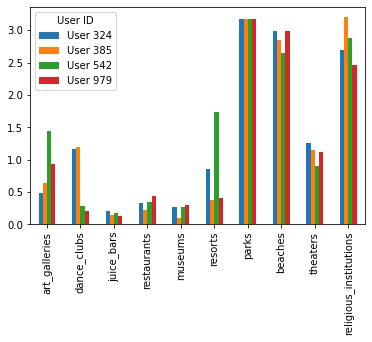

In [10]:
data[data.index.isin(['User 979', 'User 385', 'User 324', 'User 542'])].T.plot.bar()

In [11]:
data1 = data.drop(['parks', 'beaches', 'religious_institutions'],1)
data1.head()

C:\Users\risha\AppData\Local\Temp/ipykernel_10580/3502357704.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1 = data.drop(['parks', 'beaches', 'religious_institutions'],1)


,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,theaters
User ID,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,1.82
User 2,1.02,2.2,2.66,0.64,1.42,3.18,1.86
User 3,1.22,0.8,0.54,0.53,0.24,1.54,1.31
User 4,0.45,1.8,0.29,0.57,0.46,1.52,1.57
User 5,0.51,1.2,1.18,0.57,1.54,2.02,1.18


In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km.fit(data1)

KMeans(n_clusters=5)

In [13]:
data2 = data1.copy()
data2['cluster'] = km.predict(data1)

In [14]:
data2.head()

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,theaters,cluster
User ID,,,,,,,,
User 1,0.93,1.8,2.29,0.62,0.80,2.42,1.82,0
User 2,1.02,2.2,2.66,0.64,1.42,3.18,1.86,0
User 3,1.22,0.8,0.54,0.53,0.24,1.54,1.31,1
User 4,0.45,1.8,0.29,0.57,0.46,1.52,1.57,1
User 5,0.51,1.2,1.18,0.57,1.54,2.02,1.18,2


In [15]:
data2.cluster.value_counts()

1    279
4    193
3    190
0    159
2    159
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster'>

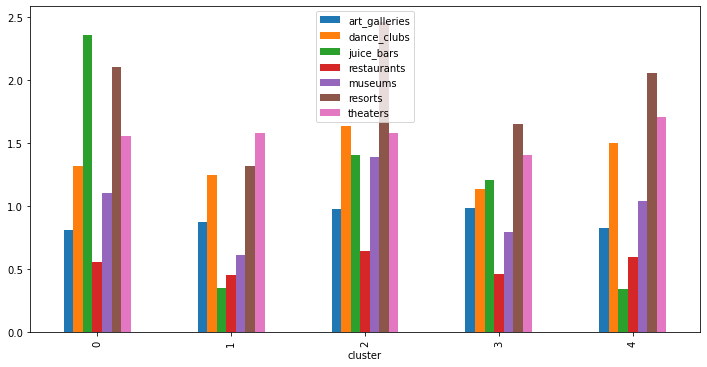

In [16]:
data2.groupby('cluster')[data1.columns].mean().plot.bar(figsize=(12,6))

In [17]:
from sklearn.preprocessing import scale
data1sc = scale(data1)

In [18]:
ine = []
for i in range(1,100):
    km = KMeans(n_clusters=i)
    km.fit(data1sc)
    ine.append(km.inertia_)

C:\Users\risha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


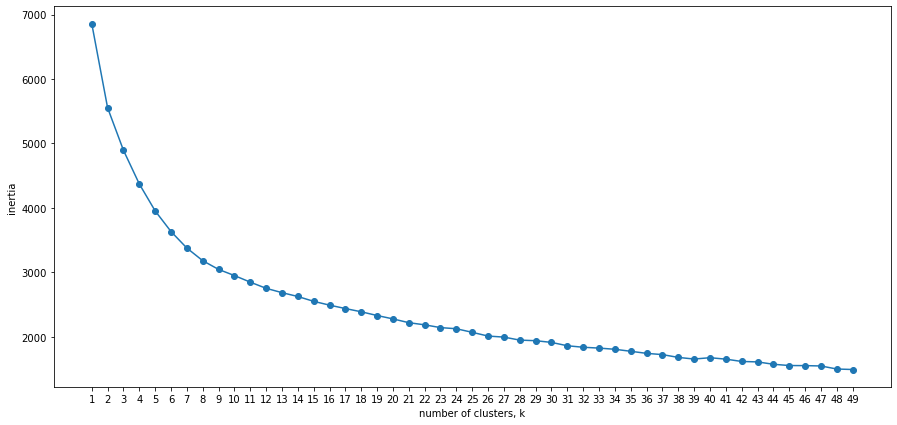

In [19]:
ks = range(1,50)
plt.figure(figsize=(15,7))
plt.plot(ks, ine[:49], '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [20]:
km = KMeans(n_clusters=8)
km.fit(data1sc)

KMeans()

In [21]:
data2 = data1.copy()
data2['cluster'] = km.predict(data1sc)

In [22]:
data2.cluster.value_counts()

0    201
2    190
1    144
3    129
5    120
6     89
7     87
4     20
Name: cluster, dtype: int64

In [23]:
data2.groupby('cluster')[data1.columns].mean().mean(1)

cluster
0    0.904293
1    1.271022
2    1.056211
3    1.404219
4    1.457357
5    1.163988
6    1.068250
7    1.489672
dtype: float64

<AxesSubplot:xlabel='cluster'>

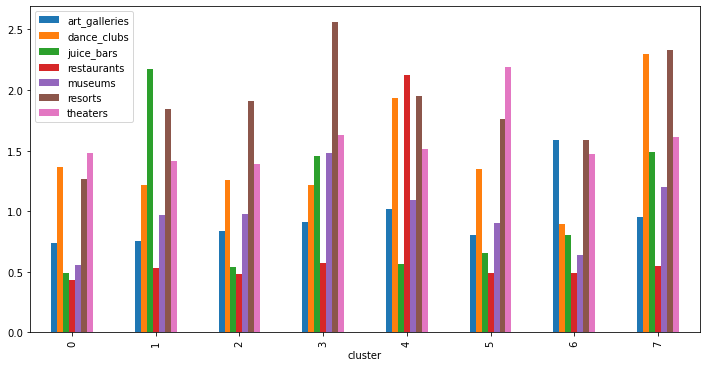

In [24]:
data2.groupby('cluster')[data1.columns].mean().plot.bar(figsize=(12,6))

In [25]:
data2[data2.cluster==3]

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,theaters,cluster
User ID,,,,,,,,
User 11,1.47,1.00,0.70,0.75,1.66,2.76,1.66,3
User 15,0.96,1.68,2.29,0.51,1.20,2.84,2.02,3
User 19,0.67,1.36,1.36,0.38,0.82,3.38,1.79,3
User 27,0.77,1.68,2.24,0.75,1.28,2.64,1.34,3
User 30,0.64,1.16,3.12,0.45,1.84,3.16,1.54,3
...,...,...,...,...,...,...,...,...
User 941,1.22,1.00,1.57,0.46,0.74,2.54,1.95,3
User 950,0.83,1.72,1.42,0.95,1.34,2.28,1.60,3
User 957,0.86,1.80,1.33,0.57,1.38,2.62,1.54,3


In [26]:
d2 = data2[data2.cluster==3]

In [27]:
d2[d2.index.isin(['User 979', 'User 385', 'User 324', 'User 542'])]

,art_galleries,dance_clubs,juice_bars,restaurants,museums,resorts,theaters,cluster
User ID,,,,,,,,


In [52]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=4)
dbscan.fit(data2)

DBSCAN(eps=1, min_samples=4)

In [53]:
clusters = dbscan.labels_
clusters

array([ 0,  0,  1,  2,  3,  2,  3,  2,  3,  4,  5,  0,  6,  4,  5,  0,  2,
        6,  5,  6,  3,  3,  3,  2,  4,  0,  5,  3,  2,  5,  6,  0,  0,  4,
        4,  2,  2,  4,  6,  1,  3,  2,  3,  4,  4,  1,  4,  3,  0,  6,  3,
        6,  5,  3,  2,  2,  6,  3,  5,  5,  0,  1,  2,  2,  1,  1,  6,  3,
        6,  2,  1,  6,  4,  6,  1,  0,  1,  6,  2,  3,  1,  4, -1,  1,  1,
        2,  2,  2,  7,  2,  1,  2,  0,  5,  0,  3,  6,  6,  6,  4,  3,  2,
        0,  2,  1,  6,  5,  2, -1,  0,  4,  6,  4,  6,  6,  3,  4,  4,  4,
        3,  0,  3,  0,  1,  6,  2,  2,  3,  3,  3,  6,  5,  5,  5,  4,  5,
        6,  6,  3,  2,  3,  2,  3,  4,  4,  0,  5,  5,  5,  5,  3,  3,  2,
        3,  2,  4,  3,  1,  0,  2,  6,  4,  4,  2,  3,  2,  6,  4,  6,  2,
        4,  1,  2,  2,  3,  3,  3,  2,  3,  2,  2,  5,  3,  1,  5,  4,  3,
        1,  5,  2,  6,  6,  1,  4,  3,  3,  2,  5,  2,  7,  5,  3,  6,  2,
        3,  2,  3,  2,  6,  3,  3,  6,  3,  2,  2,  5,  2,  2,  5,  6,  5,
        1,  0,  2,  5,  3

In [54]:
len(set(clusters))

9

In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(data2,clusters)

0.43999455150260686

In [56]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(2)

#transform the data
df = pca.fit_transform(data2)
df.shape

(980, 2)

In [59]:
df_final = pd.DataFrame(df,columns=['Plane-I','Plane-II'])
df_final['label']=data2['cluster'].tolist()
df_final.head()

,Plane-I,Plane-II,label
0,4.279681,1.075026,7
1,4.409803,1.836639,7
2,3.089188,-0.908599,6
3,-2.830931,-0.683436,0
4,-0.787798,0.429475,2


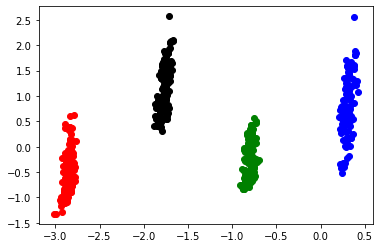

In [63]:
#filter rows of orignal state
filtered_labels0 = df_final[df_final['label'] == 0]

filtered_labels1 = df_final[df_final['label'] == 1]

filtered_labels2 = df_final[df_final['label'] == 2]

filtered_labels3 = df_final[df_final['label'] == 3]

#plotting the results
plt.scatter(filtered_labels0['Plane-I'], filtered_labels0['Plane-II'], color='red')
plt.scatter(filtered_labels1['Plane-I'], filtered_labels1['Plane-II'], color='black')
plt.scatter(filtered_labels2['Plane-I'], filtered_labels2['Plane-II'], color='green')
plt.scatter(filtered_labels3['Plane-I'], filtered_labels3['Plane-II'], color='blue')